In [2]:
# Mengakses google drive ke dalam google colaboratory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/MyDrive/narasio/coretan'

/content/gdrive/MyDrive/narasio/coretan


In [4]:
!ls

data_lazada  data_ulsan_lapak  WorkshopNLP.ipynb


## Text Analyst

In [5]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 


In [60]:
#visualisasi
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# % matplotlib inline

#prerocessing
from collections import OrderedDict

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from datetime import datetime

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#encoder
from sklearn.preprocessing import LabelEncoder

#split data
from sklearn.model_selection import train_test_split

#feture engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#modeling
from sklearn.svm import SVC

#evaluation model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from datetime import datetime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df_data = pd.read_csv('./data_lazada/20191002-reviews.csv')

In [8]:
df_data.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


## **Pre-Processing Data**

Preprocessing Data
Dalam Preprocessing data teks dengan kasus klasifikasi maka cleaning yang akan dilakukan diantaranya dengan normalisasi data dengan cara sebagai berikut



1.   Menghapus data missing
2.   Lower/Upper casing
3.   Menghilangkan pattern atau karakter yang tidak diperlukan
4.   Tokenization
5.   Lemmatization
6.   Stemming
7.   Menghilangkan Stopword

In [10]:
new_data = df_data[['category', 'name', 'rating', 'reviewTitle','reviewContent']]
new_data.head()

,category,name,rating,reviewTitle,reviewContent
0,beli-harddisk-eksternal,Kamal U.,5,NaN,bagus mantap dah sesui pesanan
1,beli-harddisk-eksternal,yofanca m.,4,NaN,"Bagus, sesuai foto"
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood
3,beli-harddisk-eksternal,Lazada Customer,4,NaN,bagus sesuai
4,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN


In [11]:
len(new_data)

203787

### **Cleaning Data missing**

In [12]:
new_data_clean = new_data.dropna()
new_data_clean.head()

,category,name,rating,reviewTitle,reviewContent
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu..."
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?"
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..


In [13]:
len (new_data_clean)

21078

In [14]:
new_data_clean['reviewJoin']= new_data_clean[['reviewTitle','reviewContent']].apply(lambda x: ' '.join(x), axis=1)
new_data_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,category,name,rating,reviewTitle,reviewContent,reviewJoin
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming..."
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....


### **Lower/Upper Case**

In [15]:
new_data_clean['review_clean']= new_data_clean['reviewJoin'].apply(lambda x: str(x).lower())
new_data_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan.. good ok...
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...","barang bagus sesuai specs pesan rabu sore,ming..."
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa? mau tanya ini cicilnya pak...
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv. tsb....


### **Cleaning Data**

In [16]:
# Mendeteksi pattern dengan Regex
# Format html
html_tag = re.compile(r'<.*?>')

# Format URL
http_link = re.compile(r'https://\S+')
www_link = re.compile(r'www\.\S+')

# Tanda baca yang tidak diperlukan
punctuation = re.compile(r'[^\w\s]') #penggunaan ^ merupakan notasi untuk menunjukkan negasi dimana dalam perintah ini berarti karakter yang bukan huruf dan bukan spasi

# Function untuk memproses cleaning teks data
def data_cleaning(text):
  # menghilangkan html tag
  text = re.sub(html_tag, r'', text)

  # menghilangkan url
  text = re.sub(http_link, r'', text)
  text = re.sub(www_link, r'', text)

  # menghilangkan tanda baca
  text = re.sub(punctuation, r'', text)

  # #menghilangkan double huruf
  # text = "".join(OrderedDict.fromkeys(text))

  return text

In [17]:
new_data_clean['review_clean'] = new_data_clean['review_clean'].apply(lambda x: data_cleaning(x))
new_data_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...


In [18]:
print ('before :', new_data_clean['reviewJoin'][11])
print ('----------------------------------')
print ('after :', new_data_clean['review_clean'][11])

before : Ini cicil pake apa? Mau tanya ini cicilnya pake apa ya,cc bkn?
----------------------------------
after : ini cicil pake apa mau tanya ini cicilnya pake apa yacc bkn


### **Stemming**

In [19]:
start_time = datetime.now()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

new_data_clean['review_steem'] = new_data_clean['review_clean'].apply(lambda x: stemmer.stem(x))
new_data_clean.head()

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

Waktu yang diperlukan: 0:29:01.365954


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### **Stop Words**

1. Sastrawi
2. NLTK

**Sastrawi**

In [20]:
factory = StopWordRemoverFactory()
list_stopword = factory.get_stop_words()
len(list_stopword)

126

In [21]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

new_data_clean['review_stp_sastrawi'] = new_data_clean['review_steem'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))
new_data_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_steem,review_stp_sastrawi
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...,mantaaapppp barang sesuai pesan good okkkkk m...
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,pengirimn ntb bima bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...,cicil pake apa mau tanya cicil pake apa yacc...
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga atas tv tsb suda ant...


**NLTK**

In [22]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [23]:
list_stopwords = set(stopwords.words('indonesian'))
len(list_stopwords)

757

In [24]:
stop = list_stopwords
new_data_clean['review_stp_nltk'] = new_data_clean['review_steem'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
new_data_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_steem,review_stp_sastrawi,review_stp_nltk
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...,mantaaapppp barang sesuai pesan good okkkkk m...,ok mantaaapppp barang sesuai pesan good okkkkk...
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,pengirimn ntb bima bima,pengirimn ntb bima bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...,cicil pake apa mau tanya cicil pake apa yacc...,cicil pake cicil pake yacc bkn
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga atas tv tsb suda ant...,beli cash sesuai harga tv tsb suda anti gores


## **EDA**

In [25]:
new_data_clean.head()

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_steem,review_stp_sastrawi,review_stp_nltk
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...,mantaaapppp barang sesuai pesan good okkkkk m...,ok mantaaapppp barang sesuai pesan good okkkkk...
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,pengirimn ntb bima bima,pengirimn ntb bima bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...,cicil pake apa mau tanya cicil pake apa yacc...,cicil pake cicil pake yacc bkn
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga atas tv tsb suda ant...,beli cash sesuai harga tv tsb suda anti gores


In [117]:
set(new_data_clean['category'])

{'beli-harddisk-eksternal',
 'beli-laptop',
 'beli-smart-tv',
 'jual-flash-drives',
 'shop-televisi-digital'}

In [36]:
df = new_data_clean.groupby('category')['rating'].mean()
fig = px.bar(df,y=df.index, x=df, color=df.index, text_auto='.3s', 
            title="Rating Produk")
fig.show()

In [50]:
df = new_data_clean.groupby('name')['name'].count()
df = df.sort_values(ascending=False)
df = df[:15]
fig = px.bar(df,y=df, x=df.index, text_auto='.3s', color=df.index,
            title="Kategori Berita")
fig.show()

In [ ]:
#wordclod berdasarkan produk

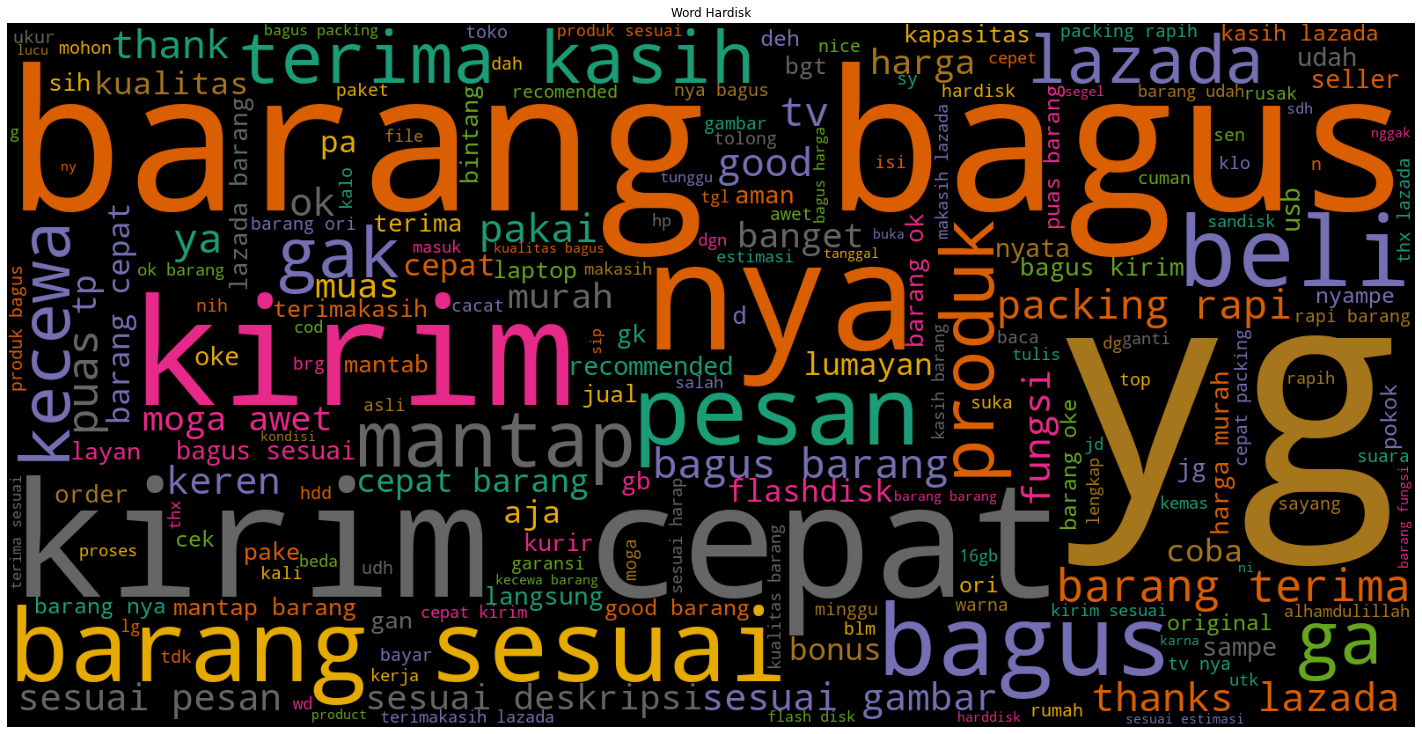

In [114]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "beli-harddisk-eksternal")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Hardisk')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

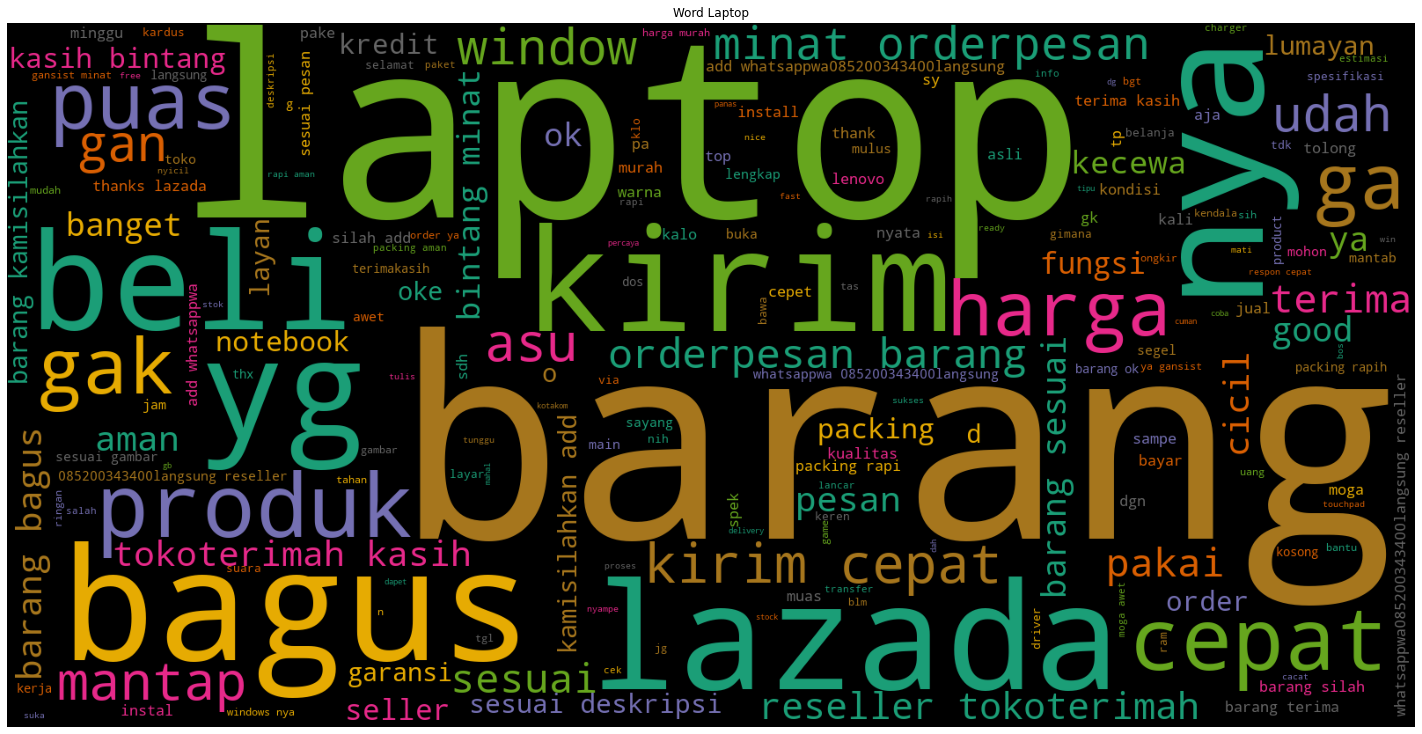

In [119]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "beli-laptop")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

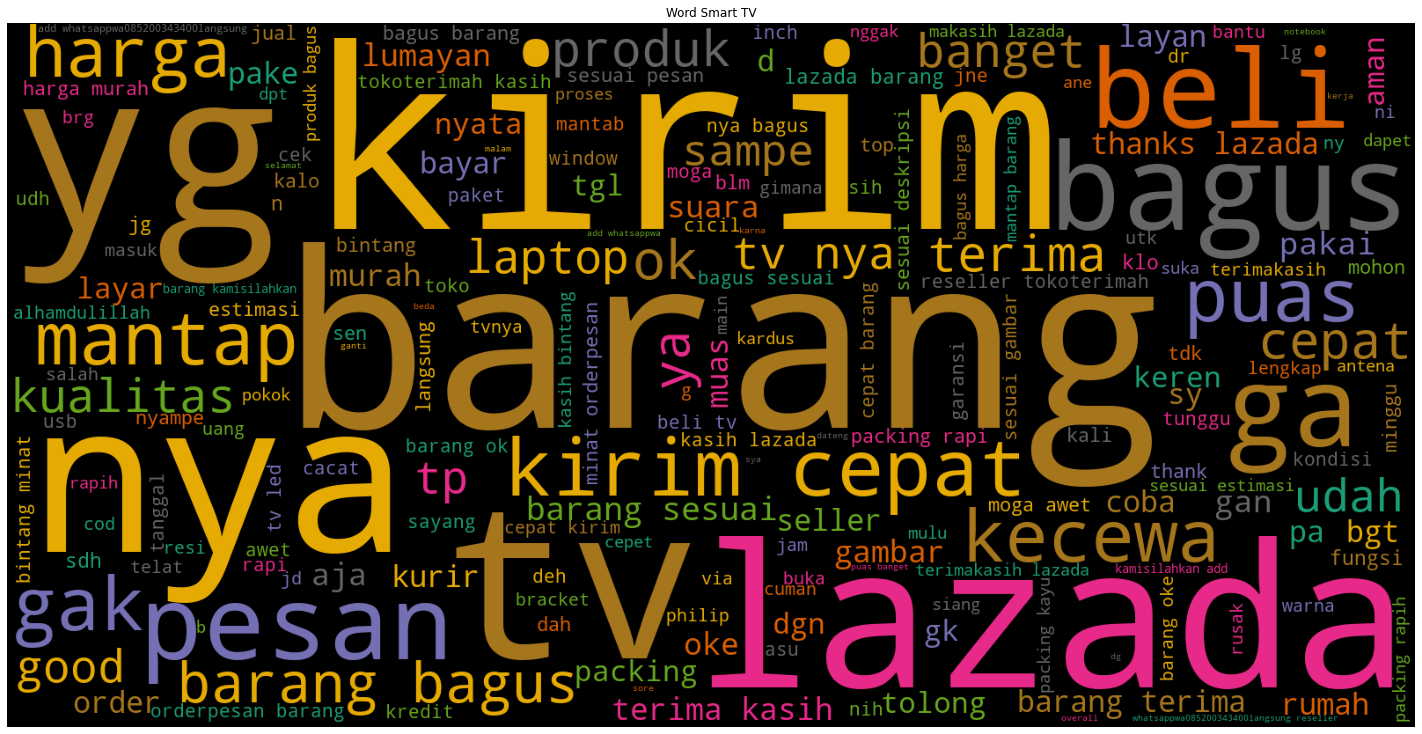

In [120]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "beli-smart-tv")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Smart TV')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

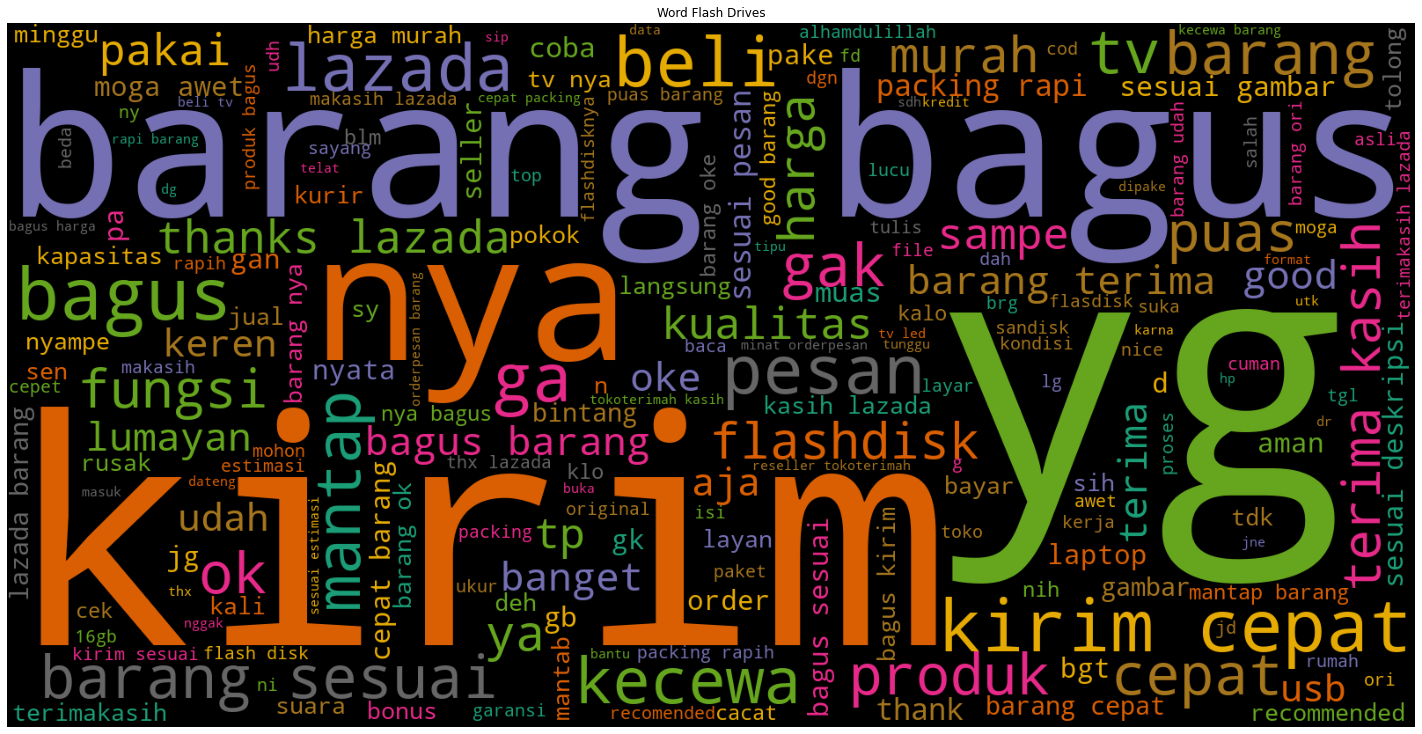

In [123]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "jual-flash-drives")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Flash Drives')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

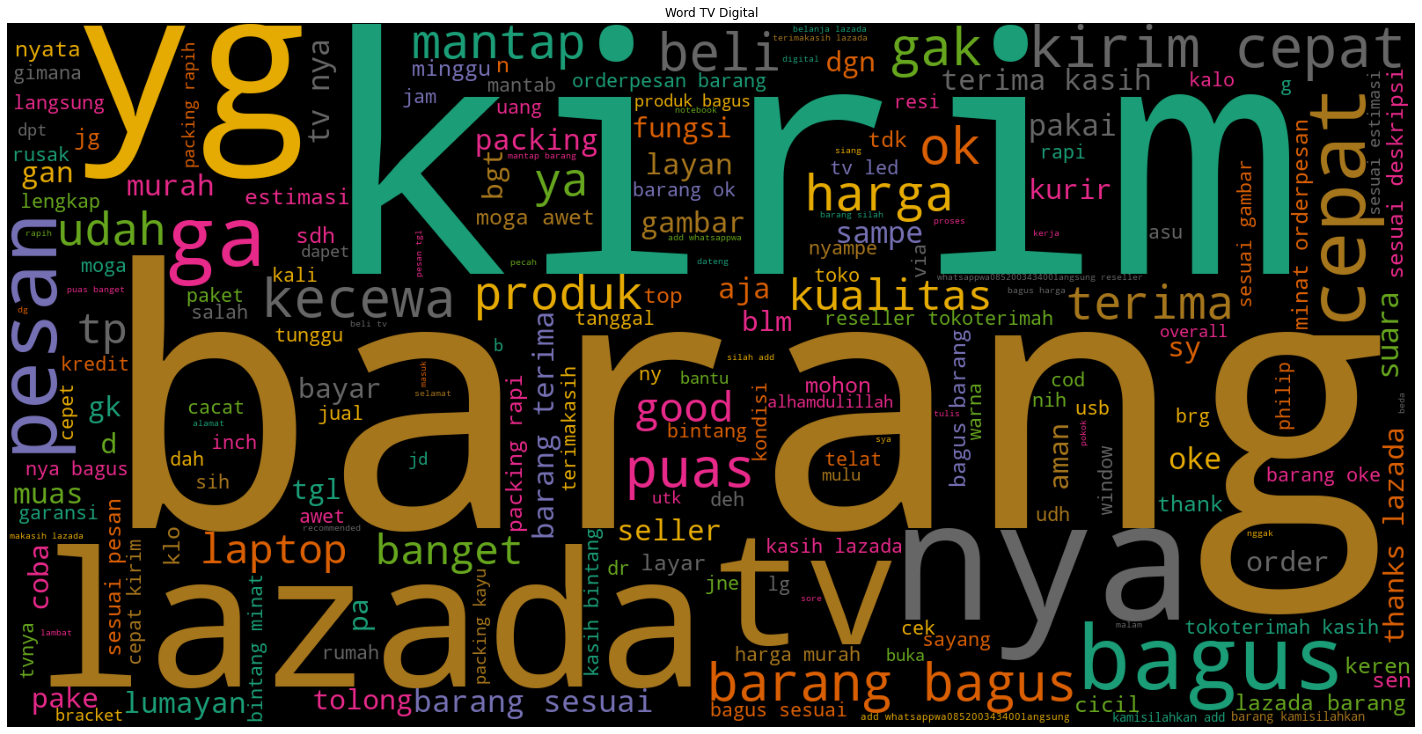

In [124]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "shop-televisi-digital")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word TV Digital')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## **Classification using SVM**

### **Label Encoder**

**using label encoder**

In [ ]:
set(new_data_clean['rating'])

{1, 2, 3, 4, 5}

In [ ]:
def change_label (rating):
  if rating < 3 :
    return ('negative')
  elif rating == 3 :
    return ('netral')
  else :
    return ('positive')

In [ ]:
new_data_clean['label'] = new_data_clean['rating'].apply(lambda x: change_label(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_data_clean['fit_label'] = LabelEncoder().fit_transform(new_data_clean['label'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_data_clean.head()

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_steem,review_stp_sastrawi,review_stp_nltk,label,fit_label
121001,jual-flash-drives,Lazada Guest,1,Tanya barang,Barang masih ada?,Tanya barang Barang masih ada?,tanya barang barang masih ada,tanya barang barang masih ada,tanya barang barang,barang barang,negative,0
126591,jual-flash-drives,Devina F.,1,"Kecewa barang ga dateng""",Pesan tggl 4 januari skrg tggl 14 januari ga d...,"Kecewa barang ga dateng"" Pesan tggl 4 januari ...",kecewa barang ga dateng pesan tggl 4 januari s...,kecewa barang ga dateng pesan tggl 4 januari s...,kecewa barang ga dateng pesan tggl 4 januari s...,kecewa barang ga dateng pesan tggl 4 januari s...,negative,0
183018,shop-televisi-digital,sandy p.,1,Bohong,"Penipuan nih, nanti barang nya digagalkan deng...","Bohong Penipuan nih, nanti barang nya digagalk...",bohong penipuan nih nanti barang nya digagalka...,bohong tipu nih nanti barang nya gagal dengan ...,bohong tipu nih barang nya gagal alas stok b...,bohong tipu nih barang nya gagal alas stok bar...,negative,0
183017,shop-televisi-digital,Santo,1,Penipu ulung,Jangan sampai beli seller penipu lagi kurang s...,Penipu ulung Jangan sampai beli seller penipu ...,penipu ulung jangan sampai beli seller penipu ...,tipu ulung jangan sampai beli seller tipu lagi...,tipu ulung jangan beli seller tipu kurang st...,tipu ulung beli seller tipu stabil otak korban...,negative,0
126546,jual-flash-drives,Kariono Y.,1,Pelayanan gak bagus.,Saya ini pelangan setia lazada. Kalau memang ...,Pelayanan gak bagus. Saya ini pelangan setia l...,pelayanan gak bagus saya ini pelangan setia la...,layan gak bagus saya ini pelang setia lazada k...,layan gak bagus pelang setia lazada kalau me...,layan gak bagus pelang setia lazada tanggal 1 ...,negative,0


**encoder manual**

In [ ]:
#mengencoder label
new_data_clean.sort_values(by=['label'], inplace=True)
new_data_clean['label_id'] = new_data_clean['label'].factorize()[0]
kategori_id_data = new_data_clean[['label', 'label_id']].drop_duplicates().sort_values('label_id')
kategori_to_id = dict(kategori_id_data.values)
id_to_kategori = dict(kategori_id_data[['label_id', 'label']].values)

leng = kategori_id_data.label_id.values
leng = len (leng)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
new_data_clean.head()

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_steem,review_stp_sastrawi,review_stp_nltk,label,fit_label,label_id
121001,jual-flash-drives,Lazada Guest,1,Tanya barang,Barang masih ada?,Tanya barang Barang masih ada?,tanya barang barang masih ada,tanya barang barang masih ada,tanya barang barang,barang barang,negative,0,0
126546,jual-flash-drives,Kariono Y.,1,Pelayanan gak bagus.,Saya ini pelangan setia lazada. Kalau memang ...,Pelayanan gak bagus. Saya ini pelangan setia l...,pelayanan gak bagus saya ini pelangan setia la...,layan gak bagus saya ini pelang setia lazada k...,layan gak bagus pelang setia lazada kalau me...,layan gak bagus pelang setia lazada tanggal 1 ...,negative,0,0
88669,beli-smart-tv,megawati s.,2,Netbook lumayan.,Pengiriman dari surabaya? ??? Ternyata jack ny...,Netbook lumayan. Pengiriman dari surabaya? ???...,netbook lumayan pengiriman dari surabaya tern...,netbook lumayan kirim dari surabaya nyata jack...,netbook lumayan kirim surabaya nyata jack nya...,netbook lumayan kirim surabaya nyata jack nya ...,negative,0,0
126544,jual-flash-drives,Iwan s.,1,Parah banget,"Parah tv tidak ada dudukannya,tidak sesuai dig...","Parah banget Parah tv tidak ada dudukannya,tid...",parah banget parah tv tidak ada dudukannyatida...,parah banget parah tv tidak ada dudukannyatida...,parah banget parah tv dudukannyatidak sesuai...,parah banget parah tv dudukannyatidak sesuai d...,negative,0,0
183008,shop-televisi-digital,Lazada Guest,1,speaker & garansi,Sama speaker skali kan? garansi berapa tahun ya?,speaker & garansi Sama speaker skali kan? gara...,speaker garansi sama speaker skali kan garans...,speaker garansi sama speaker skali kan garansi...,speaker garansi sama speaker skali kan garansi...,speaker garansi speaker skali garansi ya,negative,0,0


### **Split Data**

In [ ]:
#split data
train, test = train_test_split(new_data_clean, test_size=0.25)

In [ ]:
train.head()

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_steem,review_stp_sastrawi,review_stp_nltk,label,fit_label,label_id
95552,beli-smart-tv,Lazada Customer,4,Laptop Hp,Ok ... Bagua,Laptop Hp Ok ... Bagua,laptop hp ok bagua,laptop hp ok bagua,laptop hp bagua,laptop hp ok bagua,positive,2,2
6088,beli-harddisk-eksternal,Ghina,1,kw ni nyesel belinya,"barang jelek kok masih dijual,,flashdisk baru ...",kw ni nyesel belinya barang jelek kok masih di...,kw ni nyesel belinya barang jelek kok masih di...,kw ni nyesel beli barang jelek kok masih dijua...,kw ni nyesel beli barang jelek kok dijualflas...,kw ni nyesel beli barang jelek dijualflashdisk...,negative,0,0
11169,beli-harddisk-eksternal,Fence B.,5,"Barang bagus, garansi jelas, harga murah",Barang sudah dites dan berfungsi dengan baik. ...,"Barang bagus, garansi jelas, harga murah Baran...",barang bagus garansi jelas harga murah barang ...,barang bagus garansi jelas harga murah barang ...,barang bagus garansi jelas harga murah barang ...,barang bagus garansi harga murah barang tes fu...,positive,2,2
182755,shop-televisi-digital,Haji A.,4,Empat Bintang,"Bagi Yang Minat Order/Pesan Barang Kami,Silahk...",Empat Bintang Bagi Yang Minat Order/Pesan Bara...,empat bintang bagi yang minat orderpesan baran...,empat bintang bagi yang minat orderpesan baran...,empat bintang minat orderpesan barang kamisi...,bintang minat orderpesan barang kamisilahkan a...,positive,2,2
178993,jual-flash-drives,enjang,1,Produk tidak bagus,Produk tidak terbaca di komputer,Produk tidak bagus Produk tidak terbaca di kom...,produk tidak bagus produk tidak terbaca di kom...,produk tidak bagus produk tidak baca di komputer,produk bagus produk baca komputer,produk bagus produk baca komputer,negative,0,0


In [ ]:
test.head()

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_steem,review_stp_sastrawi,review_stp_nltk,label,fit_label,label_id
180827,jual-flash-drives,Tedi,4,OK,SIPP,OK SIPP,ok sipp,ok sipp,sipp,ok sipp,positive,2,2
117618,beli-smart-tv,mohammad a.,5,Makasih lazada,Alhamdulilah barang sudah sampai. Akhirnya bis...,Makasih lazada Alhamdulilah barang sudah sampa...,makasih lazada alhamdulilah barang sudah sampa...,makasih lazada alhamdulilah barang sudah sampa...,makasih lazada alhamdulilah barang akhir nt...,makasih lazada alhamdulilah barang ntn tv ruma...,positive,2,2
183301,shop-televisi-digital,William J.,2,Kurang Puas,"Jenis barang tersebut,ternyata harga bekasnya ...","Kurang Puas Jenis barang tersebut,ternyata har...",kurang puas jenis barang tersebutternyata harg...,kurang puas jenis barang tersebutternyata harg...,kurang puas jenis barang tersebutternyata harg...,puas jenis barang tersebutternyata harga bekas...,negative,0,0
118816,jual-flash-drives,Rahman H.,4,Good,"Barang Sudah sampai cepat di luar pekiraan , b...",Good Barang Sudah sampai cepat di luar pekiraa...,good barang sudah sampai cepat di luar pekiraa...,good barang sudah sampai cepat di luar kira ba...,good barang cepat luar kira barang bagus th...,good barang cepat barang bagus thanks lazada,positive,2,2
92156,beli-smart-tv,Muhammad Z.,5,Review,"TV bagus, semua lancar tidak ada hambatan","Review TV bagus, semua lancar tidak ada hambatan",review tv bagus semua lancar tidak ada hambatan,review tv bagus semua lancar tidak ada hambat,review tv bagus semua lancar hambat,review tv bagus lancar hambat,positive,2,2


### **Feuter Engineering & Modeling**

**Modeling without stopwords**

In [ ]:
#x_train
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['review_steem'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#y_train
y_list = list(train['fit_label'])
Y_train = np.array(y_list)

In [ ]:
print('train data : ', X_train_tfidf.shape)
print('train label : ', Y_train.shape)

train data :  (15808, 10637)
train label :  (15808,)


In [ ]:
start_time = datetime.now()

svc = SVC(kernel='linear')
svc.fit(X_train_tfidf, Y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:21.893095


In [ ]:
a = count_vect.transform(test['review_steem'])
X_test = tfidf_transformer.transform(a).toarray()
print (X_test.shape)

Y_test = list(test['fit_label'])

(5270, 10637)


In [ ]:
predictions_svm = svc.predict(X_test)

In [ ]:
print("SVM Accuracy Score : ",accuracy_score(predictions_svm, Y_test)*100, '%')

SVM Accuracy Score :  92.06831119544592 %


**Modeling with stopwords**

In [ ]:
#x_train
count_vect = CountVectorizer()
X_train_stp_counts = count_vect.fit_transform(train['review_stp_nltk'])
tfidf_transformer = TfidfTransformer()
X_train_stp_tfidf = tfidf_transformer.fit_transform(X_train_stp_counts)

#y_train
y_list = list(train['fit_label'])
Y_train_stp = np.array(y_list)

In [ ]:
print('train data : ', X_train_stp_tfidf.shape)
print('train label : ', Y_train_stp.shape)

train data :  (15808, 10372)
train label :  (15808,)


In [ ]:
start_time = datetime.now()

svc_stp = SVC(kernel='linear')
svc_stp.fit(X_train_stp_tfidf, Y_train_stp)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:17.669608


In [ ]:
a = count_vect.transform(test['review_stp_nltk'])
X_test_stp = tfidf_transformer.transform(a).toarray()
print (X_test_stp.shape)

Y_test_stp = list(test['fit_label'])

(5270, 10372)


In [ ]:
predictions_svm_stp = svc_stp.predict(X_test_stp)

In [ ]:
print("SVM Accuracy Score : ",accuracy_score(predictions_svm_stp, Y_test_stp)*100,'%')

SVM Accuracy Score :  91.65085388994308 %


### **Predict new data** 

In [ ]:
text_predict = ['bagus-bagus aja sih', 'boleh lah ya', 'apaan nih barang ga sesuai banget']
df_predict = pd.DataFrame(text_predict, columns =['text'])
df_predict

,text
0,bagus-bagus aja sih
1,boleh lah ya
2,apaan nih barang ga sesuai banget


In [ ]:
df_predict['text_clean']= df_predict['text'].apply(lambda x: str(x).lower())
df_predict['text_clean'] = df_predict['text_clean'].apply(lambda x: data_cleaning(x))
df_predict['text_steem'] = df_predict['text_clean'].apply(lambda x: stemmer.stem(x))
df_predict['text_stp_sastrawi'] = df_predict['text_steem'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))
df_predict['text_stp_nltk'] = df_predict['text_steem'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
df_predict

,text,text_clean,text_steem,text_stp_sastrawi,text_stp_nltk
0,bagus-bagus aja sih,bagusbagus aja sih,bagusbagus aja sih,bagusbagus aja sih,bagusbagus aja sih
1,boleh lah ya,boleh lah ya,boleh lah ya,lah,ya
2,apaan nih barang ga sesuai banget,apaan nih barang ga sesuai banget,apa nih barang ga sesuai banget,apa nih barang ga sesuai banget,nih barang ga sesuai banget


In [ ]:
def predict (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    y_label = id_to_kategori[y_pred[0]]
    return (y_label)

def predict_stp (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    y_label = id_to_kategori[y_pred[0]]
    return (y_label)

In [ ]:
df_predict['predict_label'] = df_predict['text_steem'].apply(lambda x : predict(x))
df_predict['predict_label_stp'] = df_predict['text_steem'].apply(lambda x : predict_stp(x))

In [ ]:
df_predict[['text','predict_label','predict_label_stp']]

,text,predict_label,predict_label_stp
0,bagus-bagus aja sih,negative,negative
1,boleh lah ya,positive,positive
2,apaan nih barang ga sesuai banget,negative,negative
